Imports

In [4]:
# to get 3d plot to be rotatable (optional)
%matplotlib widget

In [5]:
import numpy as np
import umap
from matplotlib import pyplot as plt
from e_machine import distribution_generator, e_machine, weight_initialization, reservoir

Generating hidden states, inputs, reservoir states

In [6]:
# generate hidden states and inputs
distribution = distribution_generator(num_states=6, num_outputs=2)
sigma, x = e_machine(states=["A", "B", "C", "D", "E", "F"], transition_matrix=distribution, n=500)

# initialize weights
W, v = weight_initialization(n=2)

# initialize hidden state
h = []
h_t = np.zeros_like(v)
h.append(np.transpose(h_t).tolist()[0])

# pass data through reservoir
for x_t in x:
    h_t = reservoir(h_t, x_t, W, v)
    h.append(np.transpose(h_t).tolist()[0])

In [7]:
print(distribution)

[[0.1133049  0.10755278 0.00418098 0.09070404 0.07996165 0.27228116
  0.11968647 0.02412736 0.04210837 0.00572162 0.09897782 0.04139283]
 [0.14642273 0.09169822 0.13965327 0.07733792 0.05032638 0.0041296
  0.01128881 0.19873779 0.04718748 0.07377663 0.05482497 0.10461621]
 [0.19539748 0.15509006 0.07546624 0.04617189 0.03036988 0.07427512
  0.08181525 0.11703721 0.00791316 0.09413806 0.0019169  0.12040875]
 [0.05138868 0.21091203 0.03202894 0.02123192 0.04302169 0.18284228
  0.22608779 0.06275522 0.04494604 0.01161781 0.02249371 0.09067387]
 [0.07938508 0.10490233 0.01495166 0.4510875  0.01403871 0.16748483
  0.03930108 0.01941039 0.03312921 0.04716672 0.02549245 0.00365003]
 [0.001981   0.06063994 0.06540584 0.11230685 0.29040218 0.03233042
  0.00973566 0.19167157 0.00134911 0.034383   0.18713986 0.01265458]]


In [8]:
print(W)
print(v)

[[-0.59101524  0.43419396]
 [-0.25239441  0.40921569]]
[[0.11260376]
 [0.19263562]]


In [9]:
h_0 = [i[0] for i in h]
h_1 = [i[1] for i in h]

Plotting hidden states in order

In [10]:
ordered = {
    "A" : 0,
    "B" : 1,
    "C" : 2,
    "D" : 3,
    "E" : 4,
    "F" : 5
}

sigma_ordered = [ordered[i] for i in sigma]

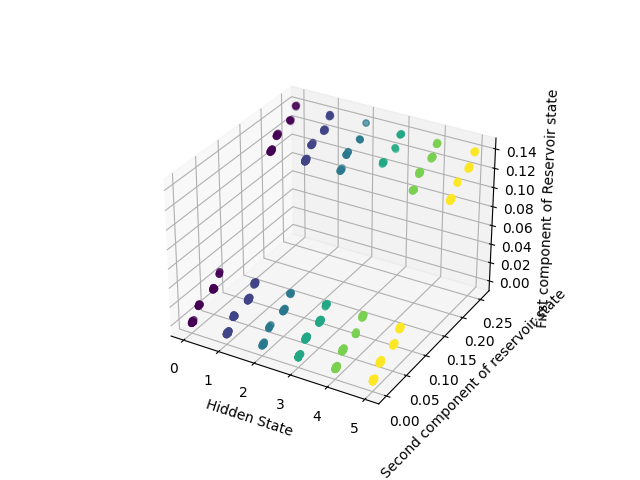

In [11]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
z = h_0
y = h_1
x_ = sigma_ordered

ax.set_zlabel("First component of Reservoir state")
ax.set_ylabel("Second component of reservoir state")
ax.set_xlabel("Hidden State")
ax.scatter(x_, y, z, c=sigma_ordered)

plt.show()

Plotting hidden states out of order

In [12]:
unordered = {
    "A" : 3,
    "B" : 4,
    "C" : 1,
    "D" : 0,
    "E" : 5,
    "F" : 2
}

sigma_unordered = [unordered[i] for i in sigma]

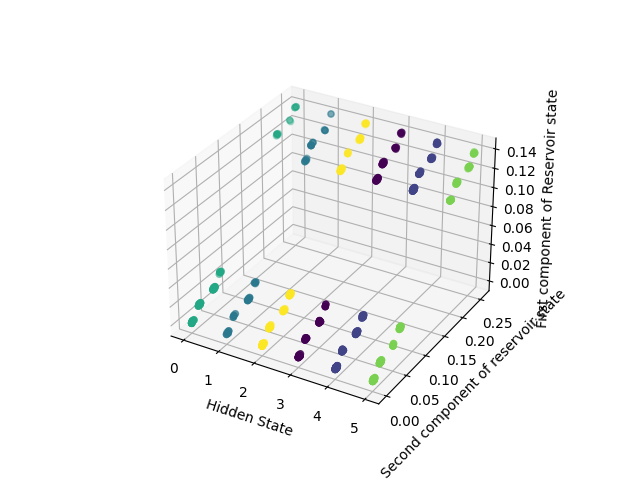

In [13]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
z = h_0
y = h_1
x_ = sigma_unordered

ax.set_zlabel("First component of Reservoir state")
ax.set_ylabel("Second component of reservoir state")
ax.set_xlabel("Hidden State")
ax.scatter(x_, y, z, c=sigma_ordered)

plt.show()

Plotting with hidden state as color

In [14]:
colors = {
    "A" : 'b',
    "B" : 'g',
    "C" : 'r',
    "D" : 'c',
    "E" : 'm',
    "F" : 'y'
}

sigma_colors = [colors[i] for i in sigma]

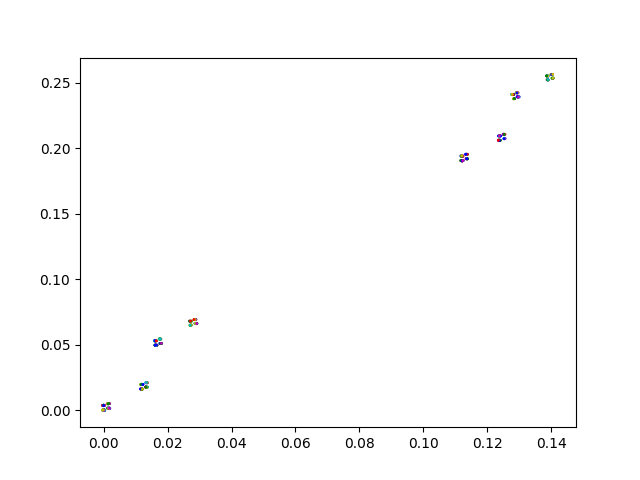

In [15]:
fig = plt.figure()
plt.scatter(h_0, h_1, s=1, c=sigma_colors)
plt.show()

Colored by input

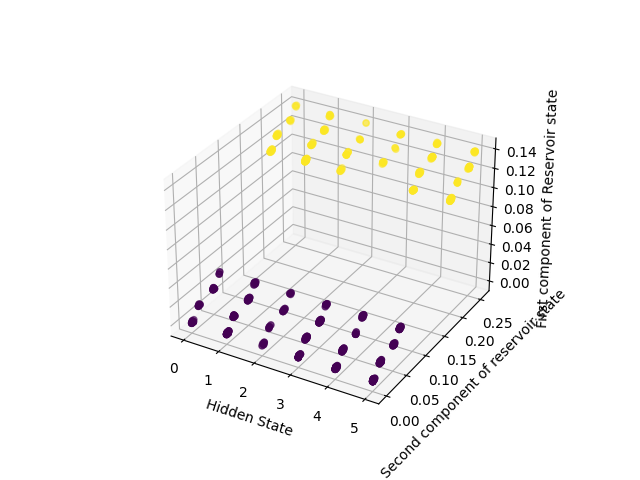

In [16]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
z = h_0
y = h_1
x_ = sigma_ordered

ax.set_zlabel("First component of Reservoir state")
ax.set_ylabel("Second component of reservoir state")
ax.set_xlabel("Hidden State")
ax.scatter(x_[1:], y[1:], z[1:], c=x)

plt.show()

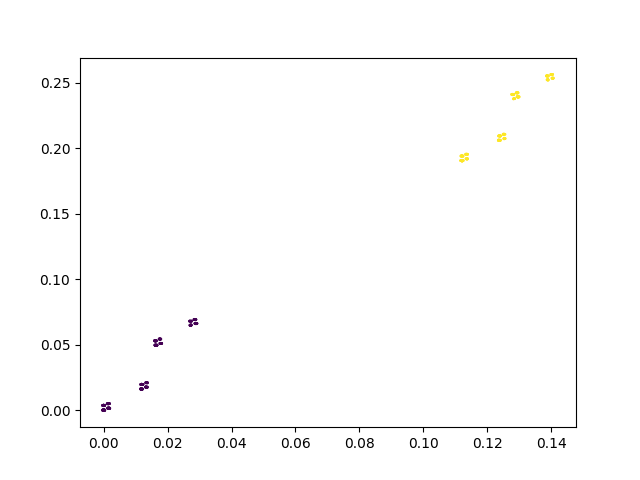

In [18]:
fig = plt.figure()
plt.scatter(h_0[1:], h_1[1:], s=1, c=x)
plt.show()